In [13]:
import numpy as np
from PIL import Image

im = Image.open('peppers.png')
img = np.array(im)

In [14]:
# convert image into numerical data with r,g,b,x,y as features of each pixel
# additionally, 
n = img.shape[0]
d = img.shape[1]

# flattened matrix of length n * d
dc = np.zeros((n*d,5))
for i in range(n):
  for j in range(d):
    dc[i*d + j][0] = img[i][j][0]
    dc[i*d + j][1] = img[i][j][1]
    dc[i*d + j][2] = img[i][j][2]
    dc[i*d + j][3] = i
    dc[i*d + j][4] = j

In [15]:
# normalise the data
cmax = np.amax(dc,axis=0)
dc /= cmax

In [16]:
# set bandwidth
r = 0.05

# define an array cid that stores the cluster id of each point
cid = np.zeros(len(dc))

# current cluster id
id = 1

# perform mean shift for each element, if the element is not already labelled
for i in range(len(dc)):
  if cid[i]!=0:
    continue

  # set current centroid
  curr = dc[i]

  # using euclidean distance as the distance metric
  sel1 = np.sum((dc - curr)**2, axis = 1) < r
  tmp = dc[sel1]
  sel2 = cid[np.where(sel1)[0]]==0
  hood = tmp[sel2]
  newc = np.mean(hood,axis=0)

  while(np.sum((newc - curr)**2) > 0.1):
    # set current centroid to the mean of the neighborhood
    curr = newc

    # reset the neighborhood
    sel1 = np.sum((dc - curr)**2, axis = 1) < r
    tmp = dc[sel1]
    sel2 = cid[np.where(sel1)[0]]==0
    hood = tmp[sel2]
    newc = np.mean(hood,axis=0)
  
  # set the cluster id of all points in the current neighborhood
  cid[sel1] = id
  id += 1

In [17]:
# set r,g,b values as same for each cluster
for i in range(id-1):
  sel = cid==i
  
  # if no occurrence of current cluster id, continue to next
  if(np.count_nonzero(sel)==0):
    continue
  
  # set r,g,b values of current cluster
  x = dc[np.where(sel)[0][0]]
  dc[sel] = x

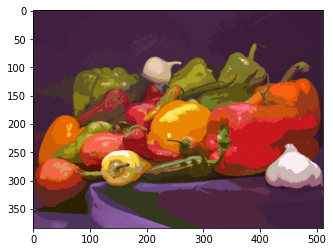

In [18]:
# plot the image
img = dc.reshape(n,d,5)

import matplotlib.pyplot as plt
plt.imshow(np.stack((img[...,0],img[...,1],img[...,2]),axis=-1))
plt.show()